# Capital Bikeshare Project:

Objective: Examine patterns in Capital Bikeshare ridership

Data Sources: Capital Bikeshare Data, Open Weather Map, Open Data DC

In [33]:
#Import dependencies
import requests
import json
import path
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
import gmaps.datasets
from numpy import radians, cos, sin, arcsin, sqrt
import datetime 

from config import gkey
gmaps.configure(api_key=gkey)



In [2]:
#Loop thru all CSV files, and add to DataFrame
list_ = []

#Change to relative path!
path = '../capitalbikeshare/CSV Files' 

allFiles = glob.glob(path + "/*.csv")

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True)

frame.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,552,2018-01-01 00:05:06,2018-01-01 00:14:18,31104,Adams Mill & Columbia Rd NW,31400,Georgia & New Hampshire Ave NW,W00886,Member
1,1282,2018-01-01 00:14:30,2018-01-01 00:35:53,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W01435,Casual
2,1265,2018-01-01 00:14:53,2018-01-01 00:35:58,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W21242,Casual
3,578,2018-01-01 00:15:31,2018-01-01 00:25:09,31406,14th & Upshur St NW,31103,16th & Harvard St NW,W21322,Casual
4,372,2018-01-01 00:18:02,2018-01-01 00:24:15,31618,4th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00119,Member


In [3]:
#Create new DataFrame with Start Date as index
m = frame.set_index(pd.DatetimeIndex(frame['Start date']))

m['Hour'] = m.index.hour
m['Month'] = m.index.month
m['Date'] = m.index.date
m['Weekday'] = m.index.weekday

#Group by hour, date and month for each member type
casual_hour = m.loc[m['Member type'] == 'Casual', :].groupby('Hour')['Bike number'].count()
casual_date = m.loc[m['Member type'] == 'Casual', :].groupby('Date')['Bike number'].count()
casual_month = m.loc[m['Member type'] == 'Casual', :].groupby('Month')['Bike number'].count()
casual_weekday = m.loc[m['Member type'] == 'Casual', :].groupby('Weekday')['Bike number'].count()

member_hour = m.loc[m['Member type'] == 'Member', :].groupby('Hour')['Bike number'].count()
member_date = m.loc[m['Member type'] == 'Member', :].groupby('Date')['Bike number'].count()
member_month = m.loc[m['Member type'] == 'Member', :].groupby('Month')['Bike number'].count()
member_weekday = m.loc[m['Member type'] == 'Member', :].groupby('Weekday')['Bike number'].count()

m.head(10)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Hour,Month,Date,Weekday
Start date,,,,,,,,,,,,,
2018-01-01 00:05:06,552,2018-01-01 00:05:06,2018-01-01 00:14:18,31104,Adams Mill & Columbia Rd NW,31400,Georgia & New Hampshire Ave NW,W00886,Member,0,1,2018-01-01,0
2018-01-01 00:14:30,1282,2018-01-01 00:14:30,2018-01-01 00:35:53,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W01435,Casual,0,1,2018-01-01,0
2018-01-01 00:14:53,1265,2018-01-01 00:14:53,2018-01-01 00:35:58,31321,15th St & Constitution Ave NW,31321,15th St & Constitution Ave NW,W21242,Casual,0,1,2018-01-01,0
2018-01-01 00:15:31,578,2018-01-01 00:15:31,2018-01-01 00:25:09,31406,14th & Upshur St NW,31103,16th & Harvard St NW,W21322,Casual,0,1,2018-01-01,0
2018-01-01 00:18:02,372,2018-01-01 00:18:02,2018-01-01 00:24:15,31618,4th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00119,Member,0,1,2018-01-01,0
2018-01-01 00:18:07,369,2018-01-01 00:18:07,2018-01-01 00:24:17,31618,4th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W21076,Member,0,1,2018-01-01,0
2018-01-01 00:19:07,486,2018-01-01 00:19:07,2018-01-01 00:27:14,31042,Market Square / King St & Royal St,31098,King St Metro North / Cameron St,W21048,Member,0,1,2018-01-01,0
2018-01-01 00:21:55,1615,2018-01-01 00:21:55,2018-01-01 00:48:50,31042,Market Square / King St & Royal St,31045,Commerce St & Fayette St,W21512,Member,0,1,2018-01-01,0
2018-01-01 00:22:02,1598,2018-01-01 00:22:02,2018-01-01 00:48:41,31042,Market Square / King St & Royal St,31045,Commerce St & Fayette St,W23278,Member,0,1,2018-01-01,0


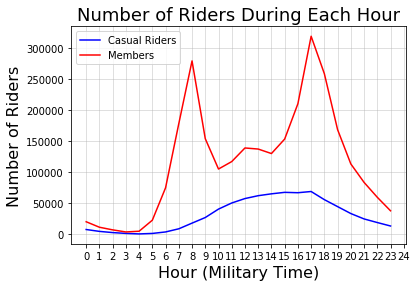

In [4]:
#Create line plot for ridership vs. hour
x_axis = np.arange(0,24,1)

casual_hour_plt = plt.plot(x_axis, casual_hour, color = 'blue', label = 'Casual Riders')
member_hour_plt = plt.plot(x_axis, member_hour, color = 'red', label = 'Members')

plt.title('Number of Riders During Each Hour', fontsize = 18)
plt.xlabel('Hour (Military Time)', fontsize = 16)
plt.xticks(np.arange(0, 25, step = 1))
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Hour.png')

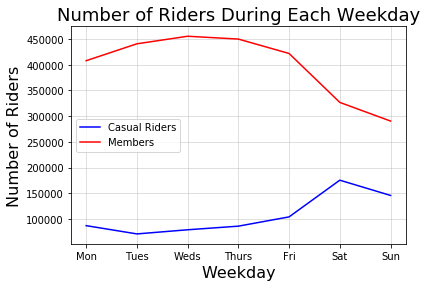

In [5]:
#Create line plot for ridership vs. month
x_axis = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']

casual_weekday_plt = plt.plot(x_axis, casual_weekday, color = 'blue', label = 'Casual Riders')
member_weekday_plt = plt.plot(x_axis, member_weekday, color = 'red', label = 'Members')

plt.title('Number of Riders During Each Weekday', fontsize = 18)
plt.xlabel('Weekday', fontsize = 16)
plt.xticks(np.arange(0, 7, step = 1))
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Weekday.png')

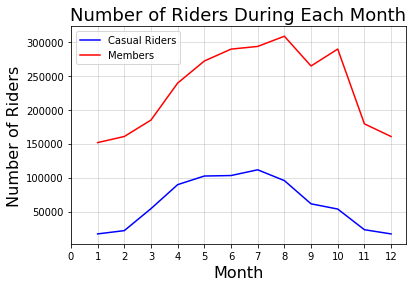

In [6]:
#Create line plot for ridership vs. month
x_axis = np.arange(1,13,1)

casual_month_plt = plt.plot(x_axis, casual_month, color = 'blue', label = 'Casual Riders')
member_month_plt = plt.plot(x_axis, member_month, color = 'red', label = 'Members')

plt.title('Number of Riders During Each Month', fontsize = 18)
plt.xlabel('Month', fontsize = 16)
plt.xticks(np.arange(0, 13, step = 1))
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Month.png')

In [8]:
#Import weather CSV

#Change to relative path
file = '../capitalbikeshare/WeatherData.csv' 


weather_frame = pd.read_csv(file, index_col=0, parse_dates=True)

weather_frame = weather_frame.dropna(axis=1, how='any')

weather_frame = weather_frame.groupby(weather_frame['dt_iso']).first()

weather_frame.reset_index(inplace=True)

weather_frame


,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2018-01-01 00:00:00 +0000 UTC,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n
1,2018-01-01 01:00:00 +0000 UTC,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n
2,2018-01-01 02:00:00 +0000 UTC,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n
3,2018-01-01 03:00:00 +0000 UTC,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n
4,2018-01-01 04:00:00 +0000 UTC,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n
5,2018-01-01 05:00:00 +0000 UTC,4366164,263.15,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n
6,2018-01-01 06:00:00 +0000 UTC,4366164,262.71,259.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n
7,2018-01-01 07:00:00 +0000 UTC,4366164,261.93,258.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n
8,2018-01-01 08:00:00 +0000 UTC,4366164,261.40,257.15,265.15,1031,84,2,327,1,800,Clear,sky is clear,01n
9,2018-01-01 09:00:00 +0000 UTC,4366164,260.83,257.15,264.15,1031,56,2,240,1,800,Clear,sky is clear,01n


In [9]:
#Convert UTC time to datetime format
weather_frame['dt_iso'] = pd.to_datetime(weather_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S +0000 %Z')

#Create new column for precipitation
weather_frame['precipitation'] = weather_frame['weather_id']
weather_frame['precipitation'] = weather_frame['precipitation'].astype(float)

weather_frame.head(100)


,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,precipitation
0,2018-01-01 00:00:00,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n,800.0
1,2018-01-01 01:00:00,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n,800.0
2,2018-01-01 02:00:00,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n,800.0
3,2018-01-01 03:00:00,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n,800.0
4,2018-01-01 04:00:00,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,800.0
5,2018-01-01 05:00:00,4366164,263.15,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,800.0
6,2018-01-01 06:00:00,4366164,262.71,259.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n,800.0
7,2018-01-01 07:00:00,4366164,261.93,258.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n,800.0
8,2018-01-01 08:00:00,4366164,261.40,257.15,265.15,1031,84,2,327,1,800,Clear,sky is clear,01n,800.0
9,2018-01-01 09:00:00,4366164,260.83,257.15,264.15,1031,56,2,240,1,800,Clear,sky is clear,01n,800.0


In [10]:
#Convert precipitation codes to numerical values - information from Open Weather e-mail

for i,row in weather_frame.iterrows():
    if row['weather_id'] == 500:
        weather_frame.at[i,'precipitation'] = 0.5
    elif row['weather_id'] == 501:
        weather_frame.at[i, 'precipitation'] = 1.5
    elif row['weather_id'] == 502:
        weather_frame.at[i, 'precipitation'] = 10
    elif row['weather_id'] == 503:
        weather_frame.at[i, 'precipitation'] = 33
    elif row['weather_id'] == 504:
        weather_frame.at[i, 'precipitation'] = 50
    elif row['weather_id'] == 600:
        weather_frame.at[i, 'precipitation'] = 0.5
    elif row['weather_id'] == 601:
        weather_frame.at[i, 'precipitation'] = 2.75
    elif row['weather_id'] == 602:
        weather_frame.at[i, 'precipitation'] = 5
    else:
        weather_frame.at[i, 'precipitation'] = 0

weather_frame.head(120)

,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,precipitation
0,2018-01-01 00:00:00,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n,0.0
1,2018-01-01 01:00:00,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n,0.0
2,2018-01-01 02:00:00,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n,0.0
3,2018-01-01 03:00:00,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n,0.0
4,2018-01-01 04:00:00,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,0.0
5,2018-01-01 05:00:00,4366164,263.15,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,0.0
6,2018-01-01 06:00:00,4366164,262.71,259.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n,0.0
7,2018-01-01 07:00:00,4366164,261.93,258.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n,0.0
8,2018-01-01 08:00:00,4366164,261.40,257.15,265.15,1031,84,2,327,1,800,Clear,sky is clear,01n,0.0
9,2018-01-01 09:00:00,4366164,260.83,257.15,264.15,1031,56,2,240,1,800,Clear,sky is clear,01n,0.0


In [11]:
#Set index to date, and add date column
n = weather_frame.set_index(pd.DatetimeIndex(weather_frame['dt_iso']))

n['Date'] = n.index.date

n.head()

,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,precipitation,Date
dt_iso,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n,0.0,2018-01-01
2018-01-01 01:00:00,2018-01-01 01:00:00,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n,0.0,2018-01-01
2018-01-01 02:00:00,2018-01-01 02:00:00,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n,0.0,2018-01-01
2018-01-01 03:00:00,2018-01-01 03:00:00,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n,0.0,2018-01-01
2018-01-01 04:00:00,2018-01-01 04:00:00,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,0.0,2018-01-01


In [12]:
#Calculate average temp per day
temp_groups = n.groupby('Date')['temp'].mean()

#Convert to Celcius from Kelvin
temp_groups_cels = (temp_groups - 273.15)

In [13]:
#Calculate total precipitation per day
precip_groups = n.groupby('Date')['precipitation'].sum()

In [14]:
#Create new DataFrame to combine riders, and weather data
weather_df = pd.DataFrame({'Casual': casual_date, 'Members': member_date, 'Average Temp (Celcius)': temp_groups_cels, 'Precipitation (mm/day)': precip_groups})

weather_df.reset_index()

weather_df.head()

,Casual,Members,Average Temp (Celcius),Precipitation (mm/day)
Date,,,,
2018-01-01,145,1068,-8.912500,0.00
2018-01-02,179,3613,-8.467083,0.50
2018-01-03,279,4469,-7.958333,0.00
2018-01-04,66,2302,-3.337500,15.25
2018-01-05,62,2647,-8.720000,0.00


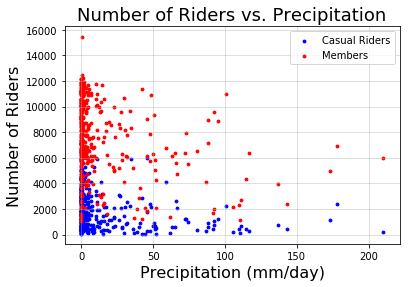

In [15]:
#Create scatter plot for ridership vs. precipitation
casual_precip_plt = plt.scatter(precip_groups, casual_date, color = 'blue', s = 8, label = 'Casual Riders')
member_precip_plt = plt.scatter(precip_groups, member_date, color = 'red', s = 8, label = 'Members')

plt.title('Number of Riders vs. Precipitation', fontsize = 18)
plt.xlabel('Precipitation (mm/day)', fontsize = 16)
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Precipitation.png')

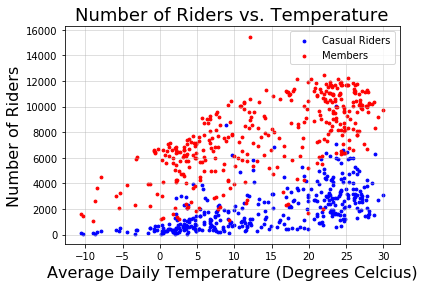

In [32]:
#Create scatter plot for ridership vs. temperature
casual_temp_plt = plt.scatter(temp_groups_cels, casual_date, color = 'blue', s = 8, label = 'Casual Riders')
member_temp_plt = plt.scatter(temp_groups_cels, member_date, color = 'red', s = 8, label = 'Members')

plt.title('Number of Riders vs. Temperature', fontsize = 18)
plt.xlabel('Average Daily Temperature (Degrees Celcius)', fontsize = 16)
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Temperature.png')

# Mapping JupyterNotebook

In [17]:
##MAPPING CODE
#frame_groups = frame['End station'].value_counts()

frame_groups_size = frame.groupby(['Start station', 'End station',"Member type"]).size()

frame_groups_size = pd.DataFrame(frame_groups_size)
frame_groups_size = frame_groups_size.reset_index()
frame_groups_size = frame_groups_size.rename(columns={0:"Frequency"})
frame_groups_size.head()

,Start station,End station,Member type,Frequency
0,10th & E St NW,10th & E St NW,Casual,426
1,10th & E St NW,10th & E St NW,Member,140
2,10th & E St NW,10th & Florida Ave NW,Casual,12
3,10th & E St NW,10th & Florida Ave NW,Member,6
4,10th & E St NW,10th & G St NW,Casual,39


In [18]:
csv_file = "Capital_Bike_Share_Locations.csv"
bikeshare_location = pd.read_csv(csv_file)

bikeshare_locations = bikeshare_location[["ADDRESS","LATITUDE","LONGITUDE"]].copy()
bikeshare_locations_start = bikeshare_locations.rename(columns={"ADDRESS": "Start station", 
                                                                "LATITUDE": "Start Lat","LONGITUDE": "Start Long"})
bikeshare_locations_end = bikeshare_locations.rename(columns={"ADDRESS": "End station", 
                                                                "LATITUDE": "End Lat","LONGITUDE": "End Long"})

routes = pd.merge(frame_groups_size, bikeshare_locations_start, on=["Start station"])
routes = pd.merge(routes, bikeshare_locations_end, on=["End station"])
routes.head()

,Start station,End station,Member type,Frequency,Start Lat,Start Long,End Lat,End Long
0,10th & E St NW,10th & E St NW,Casual,426,38.895914,-77.026064,38.895914,-77.026064
1,10th & E St NW,10th & E St NW,Member,140,38.895914,-77.026064,38.895914,-77.026064
2,10th & Florida Ave NW,10th & E St NW,Casual,13,38.920387,-77.025672,38.895914,-77.026064
3,10th & Florida Ave NW,10th & E St NW,Member,16,38.920387,-77.025672,38.895914,-77.026064
4,10th & G St NW,10th & E St NW,Casual,21,38.898243,-77.026235,38.895914,-77.026064


In [19]:
routes["Distance"] = 0.0
routes = routes.sort_values(["Frequency"], ascending=False).reset_index()

#routes = routes.columns = ["Start station", "Start Lat", "Start Long", "End station", "End Lat", "End Long", "0"]
routes.head()

,index,Start station,End station,Member type,Frequency,Start Lat,Start Long,End Lat,End Long,Distance
0,92584,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,Casual,5506,38.888767,-77.028580,38.888767,-77.028580,0.0
1,72677,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,Casual,4796,38.888553,-77.032429,38.888553,-77.032429,0.0
2,49427,4th St & Madison Dr NW,4th St & Madison Dr NW,Casual,3955,38.890493,-77.017253,38.890493,-77.017253,0.0
3,73275,Lincoln Memorial,Jefferson Memorial,Casual,3871,38.888251,-77.049426,38.879819,-77.037413,0.0
4,51597,Columbus Circle / Union Station,6th & H St NE,Member,3776,38.896960,-77.004930,38.899972,-76.998347,0.0


In [20]:
#calculates distances between starts and stops per route
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    mi = 3959 * c
    return mi

In [21]:
#adds distance to the routes dataframe

#for row in routes.iterrows():
routes["Distance"] = haversine(routes["Start Long"],routes["Start Lat"],routes["End Long"], routes["End Lat"])
#routes = routes.sort_values(["Distance"], ascending=False).reset_index()
routes.head()

,index,Start station,End station,Member type,Frequency,Start Lat,Start Long,End Lat,End Long,Distance
0,92584,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,Casual,5506,38.888767,-77.028580,38.888767,-77.028580,0.000000
1,72677,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,Casual,4796,38.888553,-77.032429,38.888553,-77.032429,0.000000
2,49427,4th St & Madison Dr NW,4th St & Madison Dr NW,Casual,3955,38.890493,-77.017253,38.890493,-77.017253,0.000000
3,73275,Lincoln Memorial,Jefferson Memorial,Casual,3871,38.888251,-77.049426,38.879819,-77.037413,0.870033
4,51597,Columbus Circle / Union Station,6th & H St NE,Member,3776,38.896960,-77.004930,38.899972,-76.998347,0.410652


In [22]:
routes_casual = routes[(routes["Member type"] == "Casual")]


marker_start_routes_casual = gmaps.symbol_layer(routes_casual[['Start Lat', 'Start Long']].head(25), fill_color='blue', stroke_color='blue', scale=5)
marker_end_routes_casual = gmaps.symbol_layer(routes_casual[['End Lat', 'End Long']].head(25), fill_color='red', stroke_color='red', scale=3)

fig = gmaps.figure()
fig.add_layer(gmaps.transit_layer())
fig.add_layer(marker_start_routes_casual)
fig.add_layer(marker_end_routes_casual)

fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
routes_casual["Frequency"].describe()

count    47853.000000
mean        15.210290
std         82.434379
min          1.000000
25%          2.000000
50%          4.000000
75%         11.000000
max       5506.000000
Name: Frequency, dtype: float64

In [24]:
routes_casual["Distance"].describe()

count    47853.000000
mean         2.013055
std          1.398822
min          0.000000
25%          1.063026
50%          1.736895
75%          2.616548
max         18.154241
Name: Distance, dtype: float64

In [25]:
routes_member = routes[(routes["Member type"] == "Member")]


marker_start_routes_member = gmaps.symbol_layer(routes_member[['Start Lat', 'Start Long']].head(25), fill_color='blue', stroke_color='blue', scale=4)
marker_end_routes_member = gmaps.symbol_layer(routes_member[['End Lat', 'End Long']].head(25), fill_color='red', stroke_color='red', scale=3)

fig = gmaps.figure()
fig.add_layer(marker_start_routes_member)
fig.add_layer(marker_end_routes_member)
fig.add_layer(gmaps.transit_layer())
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
routes_member["Frequency"].describe()

count    67561.000000
mean        39.534450
std         95.687731
min          1.000000
25%          2.000000
50%          9.000000
75%         37.000000
max       3776.000000
Name: Frequency, dtype: float64

In [27]:
routes_member["Distance"].describe()

count    67561.000000
mean         2.195852
std          1.327552
min          0.000000
25%          1.245084
50%          2.028797
75%          2.904770
max         19.000371
Name: Distance, dtype: float64

In [28]:
starts_df = frame.groupby(['Start station']).size()
starts_df = pd.DataFrame(starts_df).reset_index()
starts_df = starts_df.rename(columns={"Start station": "Station", 0: "Frequency"})

ends_df = frame.groupby(['End station']).size()
ends_df = pd.DataFrame(ends_df).reset_index()
ends_df = ends_df.rename(columns={"End station": "Station", 0: "Frequency"})


most_popular = pd.merge(starts_df, ends_df, on="Station")
most_popular["Total"] = most_popular["Frequency_x"] + most_popular["Frequency_y"]
most_popular = most_popular.rename(columns={"Frequency_x":"Start count", "Frequency_y":"End count"})

bikeshare_locations_pop = bikeshare_locations.rename(columns={"ADDRESS": "Station", 
                                                                "LATITUDE": "Lat","LONGITUDE": "Long"})
most_popular = pd.merge(most_popular, bikeshare_locations_pop, on=["Station"])
most_popular = most_popular.sort_values(["Total"], ascending=False).reset_index()
most_popular.head()


,index,Station,Start count,End count,Total,Lat,Long
0,219,Columbus Circle / Union Station,63493,68100,131593,38.896960,-77.004930
1,332,Lincoln Memorial,53869,54397,108266,38.888251,-77.049426
2,302,Jefferson Dr & 14th St SW,43993,45473,89466,38.888553,-77.032429
3,144,4th St & Madison Dr NW,41888,42119,84007,38.890493,-77.017253
4,298,Henry Bacon Dr & Lincoln Memorial Circle NW,41020,41565,82585,38.890544,-77.049379


In [29]:
#displays heatmap of most popular locations irregardless of stop or start
marker_layer = gmaps.heatmap_layer(most_popular[['Lat', 'Long']], weights=most_popular['Total'], max_intensity=50, point_radius=6.0)

fig = gmaps.figure()
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#head_len = 10
#distance_layer_start = gmaps.symbol_layer(routes_distance[['Start Lat', 'Start Long']].head(head_len), fill_color='blue', stroke_color='blue', scale=3)
#distance_layer_end = gmaps.symbol_layer(routes_distance[['End Lat', 'End Long']].head(head_len), fill_color='red', stroke_color='red', scale=3)

#fig = gmaps.figure()
#fig.add_layer(distance_layer_start)
#fig.add_layer(distance_layer_end)

#fig

#start_loc = routes_distance[['Start Lat','Start Long']].values.tolist()
#start_loc_one = start_loc[0]
#end_loc = routes_distance[['End Lat','End Long']].values.tolist()
#end_loc_one = end_loc[0]

#fig = gmaps.figure()
#long_distance = gmaps.directions_layer(start_loc_one, end_loc_one)


#fig.add_layer(long_distance)
#fig.add_layer(gmaps.transit_layer())

#fig

# API Request Jupyter Code

In [34]:
csv_file = '../capitalbikeshare/bike_data_auto.csv'
bike_api = pd.read_csv(csv_file)

In [35]:
print(len(bike_api))

35046


In [36]:
bike_api.groupby(['term_num'])

In [37]:
#casual_hour = m.loc[m['Member type'] == 'Casual', :].groupby('Hour')['Bike number'].count()
zero_bikes = bike_api.loc[bike_api['num_bikes'] == 0, :].groupby('term_num').first()
one_bike = bike_api.loc[bike_api['num_bikes'] == 1, :].groupby('term_num').first()

In [38]:
zero_bikes

,time,term_id,address,lat,long,num_bikes,num_empty_docks,obj_id
term_num,,,,,,,,
31099,2019-01-21 10:35:00,382,Madison & N Henry St,38.813485,-77.049468,0,15,238900308
31123,2019-01-21 10:35:00,397,14th & Girard St NW,38.925284,-77.032375,0,22,238900323
31201,2019-01-21 10:35:00,23,15th & P St NW,38.909850,-77.034438,0,13,238900385
31226,2019-01-21 10:35:00,90,34th St & Wisconsin Ave NW,38.916442,-77.068200,0,9,238898752
31503,2019-01-21 13:45:00,61,Florida Ave & R St NW,38.912600,-77.013500,0,15,238920440
31506,2019-01-21 12:51:00,147,1st & Rhode Island Ave NW,38.915417,-77.012289,0,15,238913774


In [39]:
one_bike_layer = gmaps.symbol_layer(one_bike[['lat', 'long']], fill_color='red', stroke_color='red', scale=4)
#marker_layer_end = gmaps.symbol_layer(routes_ten[['End Lat', 'End Long']].head(50), fill_color='red', stroke_color='red', scale=3)

fig = gmaps.figure()
fig.add_layer(one_bike_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
#bike_locations = [zero_bikes['lat'] for bikes in zero_bikes]
info_box_template = """
<dl>
<dt>Address</dt><dd>(zero_bikes['address'])</dd>
<dt>Number Docks</dt><dd>(zero_bikes['num_empty_docks'])</dd>
</dl>
"""
#bike_info = [info_box_template.format(*bikes) for bikes in zero_bikes]

zero_bikes_layer = gmaps.symbol_layer(zero_bikes[['lat', 'long']], fill_color='red', stroke_color='red', scale=4, \
                                      info_box_content=[f"Address: {c['address']} <br/>Num Docks: {c['num_empty_docks']}" for i, c in zero_bikes.iterrows()])
fig = gmaps.figure()
fig.add_layer(zero_bikes_layer)
fig

Figure(layout=FigureLayout(height='420px'))